In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)
df.head()
#imported data set

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [35]:
df2= df[['BEDRM','BATHRM','GBA','PRICE','WARD','STYLE','SALEDATE','KITCHENS']]
df2.head()
#reduced data size by getting rid of unnecessary columns

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
1,5,3,2567.0,NaN,Ward 2,3 Story,2000-08-17 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
4,3,2,5255.0,NaN,Ward 2,3 Story,NaN,1.0


In [4]:
len(df2)

158957

In [36]:
df2.isnull().sum()

BEDRM           0
BATHRM          0
GBA         52261
PRICE       60741
WARD            1
STYLE       52261
SALEDATE    26770
KITCHENS    52262
dtype: int64

In [37]:
df2=df2.dropna()

In [38]:
df2.count()

BEDRM       57898
BATHRM      57898
GBA         57898
PRICE       57898
WARD        57898
STYLE       57898
SALEDATE    57898
KITCHENS    57898
dtype: int64

In [39]:
df2.isnull().sum()
#clean data

BEDRM       0
BATHRM      0
GBA         0
PRICE       0
WARD        0
STYLE       0
SALEDATE    0
KITCHENS    0
dtype: int64

In [40]:
df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
5,5,3,5344.0,1950000.0,Ward 2,4 Story,2010-02-26 00:00:00,1.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0


In [42]:
pd.pivot_table(df2,index=["BEDRM"], values=["PRICE"]).round()

,PRICE
BEDRM,
0,1345881.0
1,436309.0
2,370905.0
3,456579.0
4,659165.0
5,1037030.0
6,1267161.0
7,1717842.0
8,810712.0


In [46]:
pd.pivot_table(df2,index=["BEDRM"], values=["PRICE"],columns=["WARD"],aggfunc=[np.mean],fill_value=0).round(0)

mean                                                         \
           PRICE                                                          
WARD      Ward 1      Ward 2     Ward 3    Ward 4     Ward 5     Ward 6   
BEDRM                                                                     
0       325833.0   3587500.0  2594120.0  316700.0   305957.0  1350413.0   
1       399136.0    814618.0  1294000.0  320533.0   211724.0   345632.0   
2       468224.0    777097.0   640142.0  316488.0   295300.0   482697.0   
3       500714.0   1030660.0   739864.0  418098.0   381272.0   568302.0   
4       637269.0   1388698.0   975389.0  581978.0   478053.0   722577.0   
5       781456.0   1734105.0  1421718.0  751975.0   573721.0   872040.0   
6       843308.0   2282718.0  1939516.0  814018.0   542236.0   892812.0   
7       907553.0   2486571.0  2700912.0  887765.0   623350.0  1000159.0   
8       819119.0   3038708.0  2638443.0  528914.0   407348.0   573041.0   
9      1037317.0   6007558.0  4422222.0  791036.0   335000.0   653279.0   
10      918000.0    843000.0  1297000.0       0.0   350000.0   921250.0   
11           0.0    280000.0        0.0  700000.0  2200000.0  1850000.0   
12      748000.0  23960287.0        0.0  291500.0   560833.0   200000.0   
13           0.0         0.0        0.0       0.0        0.0        0.0   
14      925000.0         0.0        0.0       0.0        0.0        0.0   
15     1105000.0         0.0        0.0       0.0        0.0        0.0   
20     1900000.0         0.0        0.0       0.0        0.0        0.0   

                            
                            
WARD     Ward 7     Ward 8  
BEDRM                       
0      168944.0  2777021.0  
1      191259.0   135741.0  
2      184819.0   180244.0  
3      238975.0   224318.0  
4      298160.0   278251.0  
5      323470.0   265254.0  
6      295781.0   263135.0  
7      265101.0   327200.0  
8      280391.0   355596.0  
9      340000.0   253700.0  
10     353500.0   238911.0  
11          0.0   348920.0  
12     415000.0   306438.0  
13          0.0   442500.0  
14          0.0        0.0  
15          0.0        0.0  
20          0.0        0.0

In [45]:
df2.groupby(['PRICE','WARD']).mean().round(0)


BEDRM  BATHRM      GBA  KITCHENS
PRICE      WARD                                    
1.0        Ward 5    3.0     1.0   1420.0       1.0
           Ward 8    6.0     3.0   2150.0       3.0
10.0       Ward 1    3.0     1.0    990.0       1.0
           Ward 2    3.0     2.0   2272.0       2.0
           Ward 5    3.0     2.0   1380.0       1.0
           Ward 7    2.0     1.0    880.0       1.0
250.0      Ward 1    4.0     2.0   2331.0       2.0
           Ward 4    3.0     1.0   1444.0       1.0
           Ward 5    6.0     4.0   2029.0       2.0
           Ward 6    3.0     2.0   1574.0       2.0
           Ward 7    3.0     1.0    997.0       1.0
           Ward 8    2.0     1.0   1132.0       1.0
500.0      Ward 1    3.0     3.0   2102.0       2.0
           Ward 5    4.0     2.0   1734.0       2.0
           Ward 6    7.0     2.0   4158.0       2.0
936.0      Ward 6    4.0     2.0   2142.0       1.0
1000.0     Ward 5    3.0     1.0   1024.0       1.0
           Ward 7    3.0     1.0    988.0       1.0
           Ward 8    4.0     4.0   2736.0       4.0
1377.0     Ward 1    3.0     1.0   1424.0       1.0
2000.0     Ward 7    3.0     1.0   1396.0       1.0
3000.0     Ward 7    3.0     2.0   1170.0       1.0
3997.0     Ward 7    3.0     1.0   1188.0       1.0
4101.0     Ward 8    4.0     4.0   2464.0       4.0
4156.0     Ward 4    4.0     2.0   1914.0       1.0
4500.0     Ward 1    3.0     3.0   2443.0       2.0
4850.0     Ward 8    3.0     2.0   1200.0       1.0
5000.0     Ward 5    3.0     2.0   1802.0       2.0
           Ward 6    3.0     1.0   1254.0       1.0
           Ward 7    4.0     4.0   2800.0       4.0
...                  ...     ...      ...       ...
7550000.0  Ward 2    6.0     5.0   5580.0       2.0
           Ward 3    4.0     4.0   3354.0       4.0
7576980.0  Ward 6    3.0     1.0   1316.0       1.0
7652000.0  Ward 3    5.0     5.0   6465.0       1.0
7700000.0  Ward 3    6.0     5.0   7788.0       1.0
7785000.0  Ward 3    8.0     8.0  11478.0       2.0
7850000.0  Ward 2    8.0     7.0   8085.0       1.0
7950000.0  Ward 3    7.0     6.0   7560.0       1.0
8100000.0  Ward 2    9.0     8.0   6441.0       1.0
8375000.0  Ward 3    7.0     6.0   8148.0       2.0
8450000.0  Ward 2    7.0     8.0   8240.0       1.0
8500000.0  Ward 2    9.0     8.0  10001.0       2.0
8600000.0  Ward 2    9.0     7.0   8840.0       1.0
9000000.0  Ward 2    6.0     7.0   6164.0       1.0
9100000.0  Ward 3    6.0     9.0   6518.0       2.0
10400000.0 Ward 3    7.0     5.0  10379.0       1.0
10750000.0 Ward 3    7.0     7.0   6997.0       3.0
11000000.0 Ward 6    0.0     0.0    792.0       1.0
           Ward 7    4.0     4.0   3420.0       4.0
11111111.0 Ward 2    8.0     8.0   6937.0       1.0
11984000.0 Ward 2    6.0     6.0  10760.0       2.0
12250000.0 Ward 3    9.0    12.0  12713.0       2.0
14000000.0 Ward 3    6.0     5.0   7725.0       2.0
15000000.0 Ward 3    7.0    11.0  11616.0       2.0
16100000.0 Ward 2    9.0     9.0   7910.0       2.0
18000000.0 Ward 3    7.0     9.0  15673.0       2.0
22000000.0 Ward 2    9.0     6.0  10110.0       2.0
23960287.0 Ward 2   12.0     7.0  14966.0       4.0
25000000.0 Ward 8    0.0     0.0   2000.0       0.0
25100000.0 Ward 8    0.0     4.0   4184.0       1.0

[16901 rows x 4 columns]

In [47]:
df2.groupby("WARD")

In [48]:
meanprice = df2['PRICE'].mean()
stdprice = df2['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf2= df2.copy()
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] > toprange].index)
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] < botrange].index)

copydf2.head()
#get rid of outliers

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0
8,3,3,1488.0,1430000.0,Ward 2,2 Story,2018-05-03 00:00:00,2.0
14,3,3,2692.0,1325000.0,Ward 2,2 Story,2011-09-30 00:00:00,2.0


In [49]:
len(copydf2)

56206

In [59]:
print(meanprice)
print(stdprice)
print(toprange)
print(botrange)



579923.6760855297
607651.550609751
1770920.7152806418
-611073.3631095822


In [60]:
testmean=df2['PRICE'].mean()
testmean

579923.6760855297

In [63]:
copydf2.corr()

,BEDRM,BATHRM,GBA,PRICE,KITCHENS
BEDRM,1.000000,0.598983,0.628938,0.314116,0.373266
BATHRM,0.598983,1.000000,0.653121,0.464364,0.435863
GBA,0.628938,0.653121,1.000000,0.454990,0.361815
PRICE,0.314116,0.464364,0.454990,1.000000,0.043218
KITCHENS,0.373266,0.435863,0.361815,0.043218,1.000000


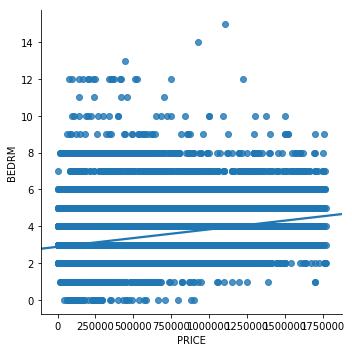

In [32]:
sns.lmplot(x="PRICE", y="BEDRM", data=copydf2)

In [64]:
ward1df2= copydf2[copydf2["WARD"]=="Ward 1"]
ward1df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
156,3,2,1505.0,200000.0,Ward 1,3 Story,2001-06-27 00:00:00,1.0
157,3,2,1281.0,650000.0,Ward 1,3 Story,2013-08-06 00:00:00,1.0
158,1,1,1530.0,660000.0,Ward 1,3 Story,2005-05-25 00:00:00,1.0
160,3,2,1335.0,830000.0,Ward 1,3 Story,2016-09-21 00:00:00,1.0
161,3,1,1170.0,635000.0,Ward 1,2 Story,2017-07-10 00:00:00,1.0


In [84]:
ward1df2.mean()

BEDRM            3.674282
BATHRM           2.224108
GBA           1763.230635
PRICE       580503.528503
KITCHENS         1.392298
dtype: float64

In [67]:
ward1df2.tail()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
59777,4,2,1320.0,587000.0,Ward 1,2 Story,2012-10-22 00:00:00,2.0
59778,2,1,1320.0,229900.0,Ward 1,2 Story,2002-08-05 00:00:00,1.0
59779,4,3,1320.0,597304.0,Ward 1,2 Story,2016-11-14 00:00:00,2.0
59780,3,2,1760.0,180000.0,Ward 1,2 Story,2003-01-06 00:00:00,1.0
59781,3,2,1320.0,330000.0,Ward 1,2 Story,2011-07-22 00:00:00,1.0


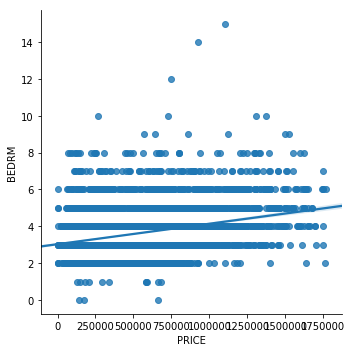

In [66]:
sns.lmplot(x="PRICE", y="BEDRM", data=ward1df2)

In [68]:
ward1df2.corr() #wanted to see if there was a greater correlation between price and bedroom,bathroom, kitchen of sq footage if i 
#reduced the data size to view by ward. 

,BEDRM,BATHRM,GBA,PRICE,KITCHENS
BEDRM,1.000000,0.612239,0.663724,0.305741,0.474787
BATHRM,0.612239,1.000000,0.583448,0.426447,0.550560
GBA,0.663724,0.583448,1.000000,0.362313,0.455522
PRICE,0.305741,0.426447,0.362313,1.000000,0.232369
KITCHENS,0.474787,0.550560,0.455522,0.232369,1.000000


In [73]:
df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
5,5,3,5344.0,1950000.0,Ward 2,4 Story,2010-02-26 00:00:00,1.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0


In [87]:
df3=df[['PRICE','WARD']]
df3.head()

,PRICE,WARD
0,1095000.0,Ward 2
1,NaN,Ward 2
2,2100000.0,Ward 2
3,1602000.0,Ward 2
4,NaN,Ward 2


In [88]:
df3['PRICE'].mean()

931351.5949336156

In [ ]:
bins= [2015-1-,100000,200000,300000,400000,500000,600000,800000,900000,1000000,2000000,50000000]
group_names= ['extremly low', 'very low','low','high low','extremly high']
df4["Range"] = pd.cut(df['PRICE'], bins, labels=group_names)
df4.head(100)#bin my seasons